Generation 0: Best Fitness = 260
Generation 1: Best Fitness = 260
Generation 2: Best Fitness = 260
Generation 3: Best Fitness = 260
Generation 4: Best Fitness = 260
Generation 5: Best Fitness = 260
Generation 6: Best Fitness = 260
Generation 7: Best Fitness = 280
Best Solution (En İyi Çözüm): [1, 1, 0, 0, 1, 1]
Total Value (Toplam Değer): 280
Total Weight (Toplam Ağırlık): 45


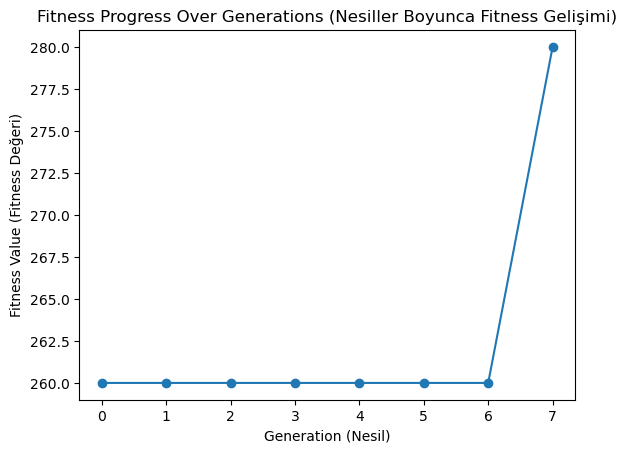

In [50]:
import random
from typing import List, Tuple, Callable, Optional
import matplotlib.pyplot as plt

# Define types for clarity
Genome = List[int]
Population = List[Genome]
FitnessFunc = Callable[[Genome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome, int, int, float], Genome]

# Problem parameters: Values and weights of items, and the knapsack capacity
values = [60, 100, 120, 20, 80, 40]  # Values of the items (eşya değerleri)
weights = [10, 20, 30, 10, 5, 10]  # Weights of the items (eşya ağırlıkları)
capacity = 50  # Maximum capacity of the knapsack (çantanın maksimum kapasitesi)


# Function to calculate the maximum fitness limit
def calculate_max_fitness(values: List[int], weights: List[int], capacity: int) -> int:
    """
    Calculates the maximum possible fitness (total value) by sorting items based on value-to-weight ratio
    and adding as many as possible without exceeding capacity.

    Eşyaların değer/ağırlık oranına göre sıralanıp kapasite aşılmadan alınabilecek en yüksek toplam değeri hesaplar.

    Args:
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Maximum possible fitness value (maksimum olası toplam değer).
    """
    items = sorted(
        zip(values, weights), key=lambda x: x[0] / x[1], reverse=True
    )  # Sort by value-to-weight ratio
    total_value, total_weight = 0, 0
    for value, weight in items:
        if total_weight + weight <= capacity:
            total_weight += weight
            total_value += value
    return total_value


# Calculate the dynamic fitness limit dynamically (Fitness limitini hesapla)
FITNESS_LIMIT = calculate_max_fitness(values, weights, capacity)


# Function to generate a random genome
def generate_genome(length: int) -> Genome:
    """
    Generates a random genome (a potential solution).

    Rastgele bir genom (olası bir çözüm) üretir.

    Args:
        length (int): Length of the genome (genom uzunluğu).

    Returns:
        Genome: A list of 0s and 1s representing the genome (genomu temsil eden 0 ve 1'lerden oluşan bir liste).
    """
    return [random.choice([0, 1]) for _ in range(length)]


# Function to generate an initial population
def generate_population(size: int, genome_length: int) -> Population:
    """
    Generates an initial population of genomes.

    Başlangıç popülasyonunu oluşturur.

    Args:
        size (int): Number of genomes in the population (popülasyondaki genom sayısı).
        genome_length (int): Length of each genome (her bir genomun uzunluğu).

    Returns:
        Population: A list of genomes (genom listesini döner).
    """
    population = [generate_genome(genome_length) for _ in range(size)]
    return population


# Fitness function for the knapsack problem
def fitness_func_knapsack(
    genome: Genome, values: List[int], weights: List[int], capacity: int
) -> int:
    """
    Calculates the fitness of a genome based on the knapsack problem.

    Bir genomun fitness değerini çantanın problemine göre hesaplar.

    Args:
        genome (Genome): The genome to evaluate (değerlendirilecek genom).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Fitness value (fitness değeri).
    """
    total_value = sum(g * v for g, v in zip(genome, values))
    total_weight = sum(g * w for g, w in zip(genome, weights))
    return total_value if total_weight <= capacity else 0


# Wrapper function for fitness
fitness_func = lambda genome: fitness_func_knapsack(genome, values, weights, capacity)


# Tournament selection method
def tournament_selection(
    population: Population, fitness_func: FitnessFunc, tournament_size: int = 3
) -> Tuple[Genome, Genome]:
    """
    Selects two genomes from the population using tournament selection.

    Turnuva seçimi yöntemi ile popülasyondan iki genom seçer.

    Args:
        population (Population): The population to select from (seçim yapılacak popülasyon).
        fitness_func (FitnessFunc): The fitness function (fitness fonksiyonu).
        tournament_size (int): Number of genomes in each tournament (her turnuvadaki genom sayısı).

    Returns:
        Tuple[Genome, Genome]: Two selected genomes (seçilen iki genom).
    """
    selected = [
        max(random.sample(population, tournament_size), key=fitness_func)
        for _ in range(2)
    ]
    return tuple(selected)


# Uniform crossover method
def uniform_crossover(a: Genome, b: Genome) -> Tuple[Genome, Genome]:
    """
    Performs uniform crossover between two genomes.

    İki genom arasında tekdüze çaprazlama gerçekleştirir.

    Args:
        a (Genome): First parent genome (birinci ebeveyn genomu).
        b (Genome): Second parent genome (ikinci ebeveyn genomu).

    Returns:
        Tuple[Genome, Genome]: Two offspring genomes (oluşturulan iki çocuk genom).
    """
    return (
        [a[i] if random.random() > 0.5 else b[i] for i in range(len(a))],
        [b[i] if random.random() > 0.5 else a[i] for i in range(len(b))],
    )


# Mutation method
def mutation(
    genome: Genome, generation: int, max_generations: int, base_prob: float = 0.1
) -> Genome:
    """
    Performs mutation on a genome with decreasing probability as generations progress.

    Nesiller ilerledikçe azalan bir olasılıkla bir genom üzerinde mutasyon yapar.

    Args:
        genome (Genome): Genome to mutate (mutasyon yapılacak genom).
        generation (int): Current generation number (mevcut nesil numarası).
        max_generations (int): Maximum number of generations (maksimum nesil sayısı).
        base_prob (float): Base mutation probability (temel mutasyon olasılığı).

    Returns:
        Genome: Mutated genome (mutasyona uğramış genom).
    """
    mutation_prob = base_prob * (1 - generation / max_generations)
    return [1 - gene if random.random() < mutation_prob else gene for gene in genome]


# Function to calculate diversity of the population
def calculate_diversity(population: Population) -> float:
    """
    Calculates the diversity of the population as the ratio of unique genomes to total genomes.

    Popülasyonun çeşitliliğini, benzersiz genomların toplam genomlara oranı olarak hesaplar.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).

    Returns:
        float: Diversity ratio (çeşitlilik oranı).
    """
    unique_genomes = len(set(tuple(genome) for genome in population))
    return unique_genomes / len(population)


# Genetic algorithm execution
def run_evolution(
    populate_func: Callable[[], Population],
    fitness_func: FitnessFunc,
    fitness_limit: int,
    generation_limit: int,
    printer: Optional[Callable[[Population, int, FitnessFunc], None]] = None,
) -> Tuple[Population, int]:
    """
    Runs the genetic algorithm to evolve solutions for the knapsack problem.

    Çantanın problemi için çözümleri geliştirmek amacıyla genetik algoritmayı çalıştırır.

    Args:
        populate_func (Callable[[], Population]): Function to generate the initial population (başlangıç popülasyonunu oluşturan fonksiyon).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
        fitness_limit (int): Fitness value to terminate the algorithm (algoritmayı sonlandırmak için fitness değeri).
        generation_limit (int): Maximum number of generations (maksimum nesil sayısı).
        printer (Optional[Callable[[Population, int, FitnessFunc], None]]): Function to print progress (ilerlemeyi yazdıran fonksiyon).

    Returns:
        Tuple[Population, int]: Final population and number of generations (son popülasyon ve nesil sayısı).
    """
    population = populate_func()
    for generation in range(generation_limit):
        population = sorted(population, key=fitness_func, reverse=True)
        best_genome = population[0]

        if printer:
            printer(population, generation, fitness_func)

        if fitness_func(best_genome) >= fitness_limit:
            break

        next_generation = population[:2]  # Elitism (elitizm)

        while len(next_generation) < len(population):
            parents = tournament_selection(population, fitness_func)
            offspring_a, offspring_b = uniform_crossover(parents[0], parents[1])
            next_generation.append(mutation(offspring_a, generation, generation_limit))
            if len(next_generation) < len(population):
                next_generation.append(
                    mutation(offspring_b, generation, generation_limit)
                )

        population = next_generation

    return population, generation


# Printer function
def printer(population, generation, fitness_func):
    """
    Prints the best genome and its fitness at each generation.

    Her nesilde en iyi genomu ve fitness değerini yazdırır.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).
        generation (int): Current generation number (mevcut nesil numarası).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
    """
    best_genome = population[0]
    best_fitness = fitness_func(best_genome)
    print(f"Generation {generation}: Best Fitness = {best_fitness}")


# Plotting function
def plot_fitness_history(fitness_history: List[int]):
    """
    Plots the fitness history over generations.

    Fitness tarihçesini nesiller boyunca çizer.

    Args:
        fitness_history (List[int]): List of fitness values over generations (nesiller boyunca fitness değerlerinin listesi).
    """
    plt.plot(range(len(fitness_history)), fitness_history, marker="o")
    plt.xlabel("Generation (Nesil)")
    plt.ylabel("Fitness Value (Fitness Değeri)")
    plt.title("Fitness Progress Over Generations (Nesiller Boyunca Fitness Gelişimi)")
    plt.show()


# Running the genetic algorithm
if __name__ == "__main__":
    POPULATION_SIZE = 20
    GENERATION_LIMIT = 100

    def fitness_history_printer(population, generation, fitness_func):
        fitness_history.append(fitness_func(population[0]))
        printer(population, generation, fitness_func)

    fitness_history = []
    population, generations = run_evolution(
        populate_func=lambda: generate_population(POPULATION_SIZE, len(values)),
        fitness_func=fitness_func,
        fitness_limit=FITNESS_LIMIT,
        generation_limit=GENERATION_LIMIT,
        printer=fitness_history_printer,
    )

    best_solution = population[0]
    print("Best Solution (En İyi Çözüm):", best_solution)
    print("Total Value (Toplam Değer):", fitness_func(best_solution))
    print(
        "Total Weight (Toplam Ağırlık):",
        sum(g * w for g, w in zip(best_solution, weights)),
    )

    plot_fitness_history(fitness_history)

Generation 0: Best Fitness = 260
Generation 1: Best Fitness = 260
Generation 2: Best Fitness = 260
Generation 3: Best Fitness = 280
Best Solution (En İyi Çözüm): [1, 1, 0, 0, 1, 1]
Total Value (Toplam Değer): 280
Total Weight (Toplam Ağırlık): 45


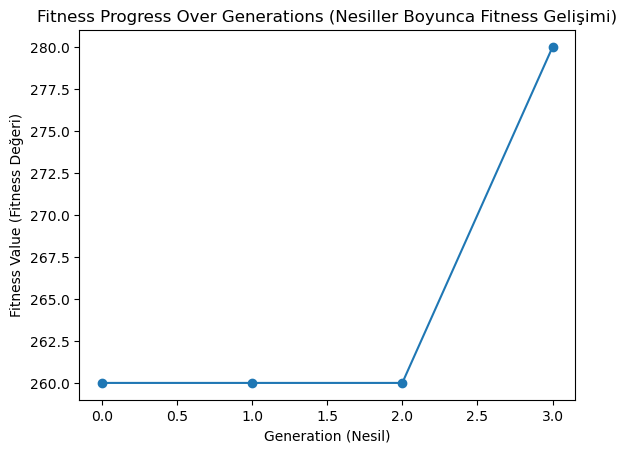

In [49]:
import random
from typing import List, Tuple, Callable, Optional
import matplotlib.pyplot as plt

# Define types for clarity
Genome = List[int]
Population = List[Genome]
FitnessFunc = Callable[[Genome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome, int, int, float], Genome]


# Function to calculate the maximum fitness limit
def calculate_max_fitness(values: List[int], weights: List[int], capacity: int) -> int:
    """
    Calculates the maximum possible fitness (total value) by sorting items based on value-to-weight ratio
    and adding as many as possible without exceeding capacity.

    Eşyaların değer/ağırlık oranına göre sıralanıp kapasite aşılmadan alınabilecek en yüksek toplam değeri hesaplar.

    Args:
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Maximum possible fitness value (maksimum olası toplam değer).
    """
    items = sorted(
        zip(values, weights), key=lambda x: x[0] / x[1], reverse=True
    )  # Sort by value-to-weight ratio
    total_value, total_weight = 0, 0
    for value, weight in items:
        if total_weight + weight <= capacity:
            total_weight += weight
            total_value += value
    return total_value


# Allow user to input values, weights, and capacity
values = list(
    map(int, input("Enter the values of items separated by spaces: ").split())
)
weights = list(
    map(int, input("Enter the weights of items separated by spaces: ").split())
)
capacity = int(input("Enter the capacity of the knapsack: "))

# Validate inputs
if len(values) != len(weights):
    raise ValueError("The number of values and weights must be the same.")

# Calculate the dynamic fitness limit dynamically (Fitness limitini hesapla)
FITNESS_LIMIT = calculate_max_fitness(values, weights, capacity)


# Function to generate a random genome
def generate_genome(length: int) -> Genome:
    """
    Generates a random genome (a potential solution).

    Rastgele bir genom (olası bir çözüm) üretir.

    Args:
        length (int): Length of the genome (genom uzunluğu).

    Returns:
        Genome: A list of 0s and 1s representing the genome (genomu temsil eden 0 ve 1'lerden oluşan bir liste).
    """
    return [random.choice([0, 1]) for _ in range(length)]


# Function to generate an initial population
def generate_population(size: int, genome_length: int) -> Population:
    """
    Generates an initial population of genomes.

    Başlangıç popülasyonunu oluşturur.

    Args:
        size (int): Number of genomes in the population (popülasyondaki genom sayısı).
        genome_length (int): Length of each genome (her bir genomun uzunluğu).

    Returns:
        Population: A list of genomes (genom listesini döner).
    """
    population = [generate_genome(genome_length) for _ in range(size)]
    return population


# Fitness function for the knapsack problem
def fitness_func_knapsack(
    genome: Genome, values: List[int], weights: List[int], capacity: int
) -> int:
    """
    Calculates the fitness of a genome based on the knapsack problem.

    Bir genomun fitness değerini çantanın problemine göre hesaplar.

    Args:
        genome (Genome): The genome to evaluate (değerlendirilecek genom).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Fitness value (fitness değeri).
    """
    total_value = sum(g * v for g, v in zip(genome, values))
    total_weight = sum(g * w for g, w in zip(genome, weights))
    return total_value if total_weight <= capacity else 0


# Wrapper function for fitness
fitness_func = lambda genome: fitness_func_knapsack(genome, values, weights, capacity)


# Tournament selection method
def tournament_selection(
    population: Population, fitness_func: FitnessFunc, tournament_size: int = 3
) -> Tuple[Genome, Genome]:
    """
    Selects two genomes from the population using tournament selection.

    Turnuva seçimi yöntemi ile popülasyondan iki genom seçer.

    Args:
        population (Population): The population to select from (seçim yapılacak popülasyon).
        fitness_func (FitnessFunc): The fitness function (fitness fonksiyonu).
        tournament_size (int): Number of genomes in each tournament (her turnuvadaki genom sayısı).

    Returns:
        Tuple[Genome, Genome]: Two selected genomes (seçilen iki genom).
    """
    selected = [
        max(random.sample(population, tournament_size), key=fitness_func)
        for _ in range(2)
    ]
    return tuple(selected)


# Uniform crossover method
def uniform_crossover(a: Genome, b: Genome) -> Tuple[Genome, Genome]:
    """
    Performs uniform crossover between two genomes.

    İki genom arasında tekdüze çaprazlama gerçekleştirir.

    Args:
        a (Genome): First parent genome (birinci ebeveyn genomu).
        b (Genome): Second parent genome (ikinci ebeveyn genomu).

    Returns:
        Tuple[Genome, Genome]: Two offspring genomes (oluşturulan iki çocuk genom).
    """
    return (
        [a[i] if random.random() > 0.5 else b[i] for i in range(len(a))],
        [b[i] if random.random() > 0.5 else a[i] for i in range(len(b))],
    )


# Mutation method
def mutation(
    genome: Genome, generation: int, max_generations: int, base_prob: float = 0.1
) -> Genome:
    """
    Performs mutation on a genome with decreasing probability as generations progress.

    Nesiller ilerledikçe azalan bir olasılıkla bir genom üzerinde mutasyon yapar.

    Args:
        genome (Genome): Genome to mutate (mutasyon yapılacak genom).
        generation (int): Current generation number (mevcut nesil numarası).
        max_generations (int): Maximum number of generations (maksimum nesil sayısı).
        base_prob (float): Base mutation probability (temel mutasyon olasılığı).

    Returns:
        Genome: Mutated genome (mutasyona uğramış genom).
    """
    mutation_prob = base_prob * (1 - generation / max_generations)
    return [1 - gene if random.random() < mutation_prob else gene for gene in genome]


# Function to calculate diversity of the population
def calculate_diversity(population: Population) -> float:
    """
    Calculates the diversity of the population as the ratio of unique genomes to total genomes.

    Popülasyonun çeşitliliğini, benzersiz genomların toplam genomlara oranı olarak hesaplar.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).

    Returns:
        float: Diversity ratio (çeşitlilik oranı).
    """
    unique_genomes = len(set(tuple(genome) for genome in population))
    return unique_genomes / len(population)


# Genetic algorithm execution
def run_evolution(
    populate_func: Callable[[], Population],
    fitness_func: FitnessFunc,
    fitness_limit: int,
    generation_limit: int,
    printer: Optional[Callable[[Population, int, FitnessFunc], None]] = None,
) -> Tuple[Population, int]:
    """
    Runs the genetic algorithm to evolve solutions for the knapsack problem.

    Çantanın problemi için çözümleri geliştirmek amacıyla genetik algoritmayı çalıştırır.

    Args:
        populate_func (Callable[[], Population]): Function to generate the initial population (başlangıç popülasyonunu oluşturan fonksiyon).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
        fitness_limit (int): Fitness value to terminate the algorithm (algoritmayı sonlandırmak için fitness değeri).
        generation_limit (int): Maximum number of generations (maksimum nesil sayısı).
        printer (Optional[Callable[[Population, int, FitnessFunc], None]]): Function to print progress (ilerlemeyi yazdıran fonksiyon).

    Returns:
        Tuple[Population, int]: Final population and number of generations (son popülasyon ve nesil sayısı).
    """
    population = populate_func()
    for generation in range(generation_limit):
        population = sorted(population, key=fitness_func, reverse=True)
        best_genome = population[0]

        if printer:
            printer(population, generation, fitness_func)

        if fitness_func(best_genome) >= fitness_limit:
            break

        next_generation = population[:2]  # Elitism (elitizm)

        while len(next_generation) < len(population):
            parents = tournament_selection(population, fitness_func)
            offspring_a, offspring_b = uniform_crossover(parents[0], parents[1])
            next_generation.append(mutation(offspring_a, generation, generation_limit))
            if len(next_generation) < len(population):
                next_generation.append(
                    mutation(offspring_b, generation, generation_limit)
                )

        population = next_generation

    return population, generation


# Printer function
def printer(population, generation, fitness_func):
    """
    Prints the best genome and its fitness at each generation.

    Her nesilde en iyi genomu ve fitness değerini yazdırır.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).
        generation (int): Current generation number (mevcut nesil numarası).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
    """
    best_genome = population[0]
    best_fitness = fitness_func(best_genome)
    print(f"Generation {generation}: Best Fitness = {best_fitness}")


# Plotting function
def plot_fitness_history(fitness_history: List[int]):
    """
    Plots the fitness history over generations.

    Fitness tarihçesini nesiller boyunca çizer.

    Args:
        fitness_history (List[int]): List of fitness values over generations (nesiller boyunca fitness değerlerinin listesi).
    """
    plt.plot(range(len(fitness_history)), fitness_history, marker="o")
    plt.xlabel("Generation (Nesil)")
    plt.ylabel("Fitness Value (Fitness Değeri)")
    plt.title("Fitness Progress Over Generations (Nesiller Boyunca Fitness Gelişimi)")
    plt.show()


# Running the genetic algorithm
if __name__ == "__main__":
    POPULATION_SIZE = 20
    GENERATION_LIMIT = 100

    def fitness_history_printer(population, generation, fitness_func):
        fitness_history.append(fitness_func(population[0]))
        printer(population, generation, fitness_func)

    fitness_history = []
    population, generations = run_evolution(
        populate_func=lambda: generate_population(POPULATION_SIZE, len(values)),
        fitness_func=fitness_func,
        fitness_limit=FITNESS_LIMIT,
        generation_limit=GENERATION_LIMIT,
        printer=fitness_history_printer,
    )

    best_solution = population[0]
    print("Best Solution (En İyi Çözüm):", best_solution)
    print("Total Value (Toplam Değer):", fitness_func(best_solution))
    print(
        "Total Weight (Toplam Ağırlık):",
        sum(g * w for g, w in zip(best_solution, weights)),
    )

    plot_fitness_history(fitness_history)

Generation 0: Best Fitness = 280
Best Solution (En İyi Çözüm): [1, 1, 0, 0, 1, 1]
Total Value (Toplam Değer): 280
Total Weight (Toplam Ağırlık): 45
   Item  Value  Weight Included
0     1     60      10      Yes
1     2    100      20      Yes
2     3    120      30       No
3     4     20      10       No
4     5     80       5      Yes
5     6     40      10      Yes


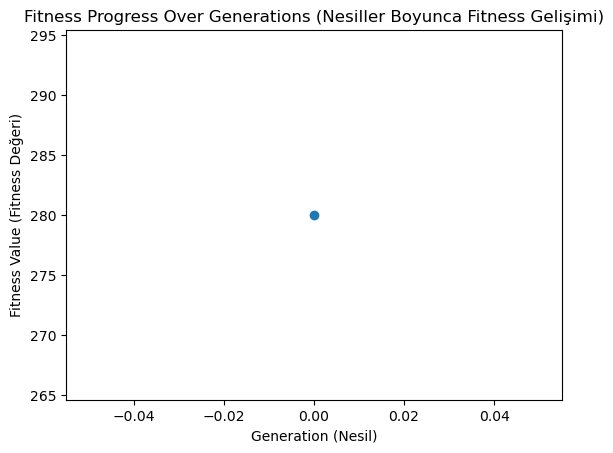

In [52]:
import random
from typing import List, Tuple, Callable, Optional
import matplotlib.pyplot as plt
import pandas as pd

# Define types for clarity
Genome = List[int]
Population = List[Genome]
FitnessFunc = Callable[[Genome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome, int, int, float], Genome]


# Function to calculate the maximum fitness limit
def calculate_max_fitness(values: List[int], weights: List[int], capacity: int) -> int:
    """
    Calculates the maximum possible fitness (total value) by sorting items based on value-to-weight ratio
    and adding as many as possible without exceeding capacity.

    Eşyaların değer/ağırlık oranına göre sıralanıp kapasite aşılmadan alınabilecek en yüksek toplam değeri hesaplar.

    Args:
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Maximum possible fitness value (maksimum olası toplam değer).
    """
    items = sorted(
        zip(values, weights), key=lambda x: x[0] / x[1], reverse=True
    )  # Sort by value-to-weight ratio
    total_value, total_weight = 0, 0
    for value, weight in items:
        if total_weight + weight <= capacity:
            total_weight += weight
            total_value += value
    return total_value


# Allow user to input values, weights, and capacity
values = list(
    map(int, input("Enter the values of items separated by spaces: ").split())
)
weights = list(
    map(int, input("Enter the weights of items separated by spaces: ").split())
)
capacity = int(input("Enter the capacity of the knapsack: "))

# Validate inputs
if len(values) != len(weights):
    raise ValueError("The number of values and weights must be the same.")

# Calculate the dynamic fitness limit dynamically (Fitness limitini hesapla)
FITNESS_LIMIT = calculate_max_fitness(values, weights, capacity)


# Function to generate a random genome
def generate_genome(length: int) -> Genome:
    """
    Generates a random genome (a potential solution).

    Rastgele bir genom (olası bir çözüm) üretir.

    Args:
        length (int): Length of the genome (genom uzunluğu).

    Returns:
        Genome: A list of 0s and 1s representing the genome (genomu temsil eden 0 ve 1'lerden oluşan bir liste).
    """
    return [random.choice([0, 1]) for _ in range(length)]


# Function to generate an initial population
def generate_population(size: int, genome_length: int) -> Population:
    """
    Generates an initial population of genomes.

    Başlangıç popülasyonunu oluşturur.

    Args:
        size (int): Number of genomes in the population (popülasyondaki genom sayısı).
        genome_length (int): Length of each genome (her bir genomun uzunluğu).

    Returns:
        Population: A list of genomes (genom listesini döner).
    """
    population = [generate_genome(genome_length) for _ in range(size)]
    return population


# Fitness function for the knapsack problem
def fitness_func_knapsack(
    genome: Genome, values: List[int], weights: List[int], capacity: int
) -> int:
    """
    Calculates the fitness of a genome based on the knapsack problem.

    Bir genomun fitness değerini çantanın problemine göre hesaplar.

    Args:
        genome (Genome): The genome to evaluate (değerlendirilecek genom).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Fitness value (fitness değeri).
    """
    total_value = sum(g * v for g, v in zip(genome, values))
    total_weight = sum(g * w for g, w in zip(genome, weights))
    return total_value if total_weight <= capacity else 0


# Wrapper function for fitness
fitness_func = lambda genome: fitness_func_knapsack(genome, values, weights, capacity)


# Tournament selection method
def tournament_selection(
    population: Population, fitness_func: FitnessFunc, tournament_size: int = 3
) -> Tuple[Genome, Genome]:
    """
    Selects two genomes from the population using tournament selection.

    Turnuva seçimi yöntemi ile popülasyondan iki genom seçer.

    Args:
        population (Population): The population to select from (seçim yapılacak popülasyon).
        fitness_func (FitnessFunc): The fitness function (fitness fonksiyonu).
        tournament_size (int): Number of genomes in each tournament (her turnuvadaki genom sayısı).

    Returns:
        Tuple[Genome, Genome]: Two selected genomes (seçilen iki genom).
    """
    selected = [
        max(random.sample(population, tournament_size), key=fitness_func)
        for _ in range(2)
    ]
    return tuple(selected)


# Uniform crossover method
def uniform_crossover(a: Genome, b: Genome) -> Tuple[Genome, Genome]:
    """
    Performs uniform crossover between two genomes.

    İki genom arasında tekdüze çaprazlama gerçekleştirir.

    Args:
        a (Genome): First parent genome (birinci ebeveyn genomu).
        b (Genome): Second parent genome (ikinci ebeveyn genomu).

    Returns:
        Tuple[Genome, Genome]: Two offspring genomes (oluşturulan iki çocuk genom).
    """
    return (
        [a[i] if random.random() > 0.5 else b[i] for i in range(len(a))],
        [b[i] if random.random() > 0.5 else a[i] for i in range(len(b))],
    )


# Mutation method
def mutation(
    genome: Genome, generation: int, max_generations: int, base_prob: float = 0.1
) -> Genome:
    """
    Performs mutation on a genome with decreasing probability as generations progress.

    Nesiller ilerledikçe azalan bir olasılıkla bir genom üzerinde mutasyon yapar.

    Args:
        genome (Genome): Genome to mutate (mutasyon yapılacak genom).
        generation (int): Current generation number (mevcut nesil numarası).
        max_generations (int): Maximum number of generations (maksimum nesil sayısı).
        base_prob (float): Base mutation probability (temel mutasyon olasılığı).

    Returns:
        Genome: Mutated genome (mutasyona uğramış genom).
    """
    mutation_prob = base_prob * (1 - generation / max_generations)
    return [1 - gene if random.random() < mutation_prob else gene for gene in genome]


# Function to calculate diversity of the population
def calculate_diversity(population: Population) -> float:
    """
    Calculates the diversity of the population as the ratio of unique genomes to total genomes.

    Popülasyonun çeşitliliğini, benzersiz genomların toplam genomlara oranı olarak hesaplar.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).

    Returns:
        float: Diversity ratio (çeşitlilik oranı).
    """
    unique_genomes = len(set(tuple(genome) for genome in population))
    return unique_genomes / len(population)


# Genetic algorithm execution
def run_evolution(
    populate_func: Callable[[], Population],
    fitness_func: FitnessFunc,
    fitness_limit: int,
    generation_limit: int,
    printer: Optional[Callable[[Population, int, FitnessFunc], None]] = None,
) -> Tuple[Population, int]:
    """
    Runs the genetic algorithm to evolve solutions for the knapsack problem.

    Çantanın problemi için çözümleri geliştirmek amacıyla genetik algoritmayı çalıştırır.

    Args:
        populate_func (Callable[[], Population]): Function to generate the initial population (başlangıç popülasyonunu oluşturan fonksiyon).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
        fitness_limit (int): Fitness value to terminate the algorithm (algoritmayı sonlandırmak için fitness değeri).
        generation_limit (int): Maximum number of generations (maksimum nesil sayısı).
        printer (Optional[Callable[[Population, int, FitnessFunc], None]]): Function to print progress (ilerlemeyi yazdıran fonksiyon).

    Returns:
        Tuple[Population, int]: Final population and number of generations (son popülasyon ve nesil sayısı).
    """
    population = populate_func()
    for generation in range(generation_limit):
        population = sorted(population, key=fitness_func, reverse=True)
        best_genome = population[0]

        if printer:
            printer(population, generation, fitness_func)

        if fitness_func(best_genome) >= fitness_limit:
            break

        next_generation = population[:2]  # Elitism (elitizm)

        while len(next_generation) < len(population):
            parents = tournament_selection(population, fitness_func)
            offspring_a, offspring_b = uniform_crossover(parents[0], parents[1])
            next_generation.append(mutation(offspring_a, generation, generation_limit))
            if len(next_generation) < len(population):
                next_generation.append(
                    mutation(offspring_b, generation, generation_limit)
                )

        population = next_generation

    return population, generation


# Printer function
def printer(population, generation, fitness_func):
    """
    Prints the best genome and its fitness at each generation.

    Her nesilde en iyi genomu ve fitness değerini yazdırır.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).
        generation (int): Current generation number (mevcut nesil numarası).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
    """
    best_genome = population[0]
    best_fitness = fitness_func(best_genome)
    print(f"Generation {generation}: Best Fitness = {best_fitness}")


# Plotting function
def plot_fitness_history(fitness_history: List[int]):
    """
    Plots the fitness history over generations.

    Fitness tarihçesini nesiller boyunca çizer.

    Args:
        fitness_history (List[int]): List of fitness values over generations (nesiller boyunca fitness değerlerinin listesi).
    """
    plt.plot(range(len(fitness_history)), fitness_history, marker="o")
    plt.xlabel("Generation (Nesil)")
    plt.ylabel("Fitness Value (Fitness Değeri)")
    plt.title("Fitness Progress Over Generations (Nesiller Boyunca Fitness Gelişimi)")
    plt.show()


# Display item details as a table
def display_item_details(best_genome: Genome, values: List[int], weights: List[int]):
    """
    Displays the details of the selected items in a table format.

    Seçilen eşyaların detaylarını tablo formatında gösterir.

    Args:
        best_genome (Genome): The best solution genome (en iyi çözüm genomu).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
    """
    data = {
        "Item": list(range(1, len(values) + 1)),
        "Value": values,
        "Weight": weights,
        "Included": ["Yes" if gene == 1 else "No" for gene in best_genome],
    }
    df = pd.DataFrame(data)
    print(df)


# Running the genetic algorithm
if __name__ == "__main__":
    POPULATION_SIZE = 20
    GENERATION_LIMIT = 100

    def fitness_history_printer(population, generation, fitness_func):
        fitness_history.append(fitness_func(population[0]))
        printer(population, generation, fitness_func)

    fitness_history = []
    population, generations = run_evolution(
        populate_func=lambda: generate_population(POPULATION_SIZE, len(values)),
        fitness_func=fitness_func,
        fitness_limit=FITNESS_LIMIT,
        generation_limit=GENERATION_LIMIT,
        printer=fitness_history_printer,
    )

    best_solution = population[0]
    print("Best Solution (En İyi Çözüm):", best_solution)
    print("Total Value (Toplam Değer):", fitness_func(best_solution))
    print(
        "Total Weight (Toplam Ağırlık):",
        sum(g * w for g, w in zip(best_solution, weights)),
    )

    # Display the table of item details
    display_item_details(best_solution, values, weights)

    plot_fitness_history(fitness_history)

Generation 0: Best Fitness = 280
Best Solution (En İyi Çözüm): [1, 1, 0, 0, 1, 1]
Total Value (Toplam Değer): 280
Total Weight (Toplam Ağırlık): 45
   Item  Value  Weight Included
0     1     60      10      Yes
1     2    100      20      Yes
2     3    120      30       No
3     4     20      10       No
4     5     80       5      Yes
5     6     40      10      Yes


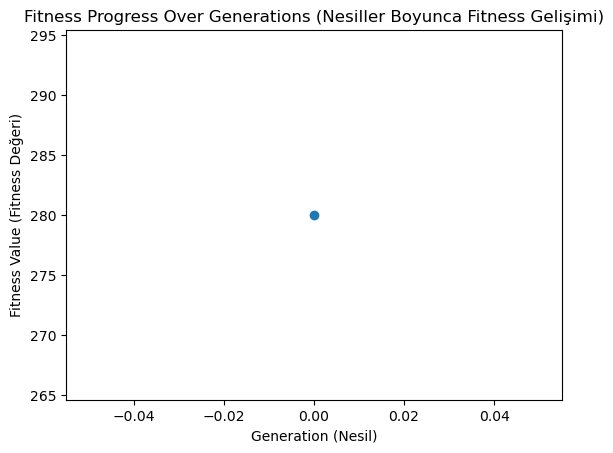

In [1]:
import random
from typing import List, Tuple, Callable, Optional
import matplotlib.pyplot as plt
import pandas as pd

# Define types for clarity
Genome = List[int]
Population = List[Genome]
FitnessFunc = Callable[[Genome], int]
SelectionFunc = Callable[[Population, FitnessFunc], Tuple[Genome, Genome]]
CrossoverFunc = Callable[[Genome, Genome], Tuple[Genome, Genome]]
MutationFunc = Callable[[Genome, int, int, float], Genome]


# Function to calculate the maximum fitness limit
def calculate_max_fitness(values: List[int], weights: List[int], capacity: int) -> int:
    """
    Calculates the maximum possible fitness (total value) by sorting items based on value-to-weight ratio
    and adding as many as possible without exceeding capacity.

    Eşyaların değer/ağırlık oranına göre sıralanıp kapasite aşılmadan alınabilecek en yüksek toplam değeri hesaplar.

    Args:
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Maximum possible fitness value (maksimum olası toplam değer).
    """
    items = sorted(
        zip(values, weights), key=lambda x: x[0] / x[1], reverse=True
    )  # Sort by value-to-weight ratio
    total_value, total_weight = 0, 0
    for value, weight in items:
        if total_weight + weight <= capacity:
            total_weight += weight
            total_value += value
    return total_value


# Default problem parameters
default_values = [60, 100, 120, 20, 80, 40]
default_weights = [10, 20, 30, 10, 5, 10]
default_capacity = 50

# Allow user to choose between defaults or custom inputs
use_defaults = int(
    input("Enter 1 to use default values and weights, or 0 to input your own: ")
)
if use_defaults == 1:
    values = default_values
    weights = default_weights
    capacity = default_capacity
else:
    values = list(
        map(int, input("Enter the values of items separated by spaces: ").split())
    )
    weights = list(
        map(int, input("Enter the weights of items separated by spaces: ").split())
    )
    capacity = int(input("Enter the capacity of the knapsack: "))

# Validate inputs
if len(values) != len(weights):
    raise ValueError("The number of values and weights must be the same.")

# Calculate the dynamic fitness limit dynamically (Fitness limitini hesapla)
FITNESS_LIMIT = calculate_max_fitness(values, weights, capacity)


# Function to generate a random genome
def generate_genome(length: int) -> Genome:
    """
    Generates a random genome (a potential solution).

    Rastgele bir genom (olası bir çözüm) üretir.

    Args:
        length (int): Length of the genome (genom uzunluğu).

    Returns:
        Genome: A list of 0s and 1s representing the genome (genomu temsil eden 0 ve 1'lerden oluşan bir liste).
    """
    return [random.choice([0, 1]) for _ in range(length)]


# Function to generate an initial population
def generate_population(size: int, genome_length: int) -> Population:
    """
    Generates an initial population of genomes.

    Başlangıç popülasyonunu oluşturur.

    Args:
        size (int): Number of genomes in the population (popülasyondaki genom sayısı).
        genome_length (int): Length of each genome (her bir genomun uzunluğu).

    Returns:
        Population: A list of genomes (genom listesini döner).
    """
    population = [generate_genome(genome_length) for _ in range(size)]
    return population


# Fitness function for the knapsack problem
def fitness_func_knapsack(
    genome: Genome, values: List[int], weights: List[int], capacity: int
) -> int:
    """
    Calculates the fitness of a genome based on the knapsack problem.

    Bir genomun fitness değerini çantanın problemine göre hesaplar.

    Args:
        genome (Genome): The genome to evaluate (değerlendirilecek genom).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
        capacity (int): Knapsack capacity (çantanın kapasitesi).

    Returns:
        int: Fitness value (fitness değeri).
    """
    total_value = sum(g * v for g, v in zip(genome, values))
    total_weight = sum(g * w for g, w in zip(genome, weights))
    return total_value if total_weight <= capacity else 0


# Wrapper function for fitness
fitness_func = lambda genome: fitness_func_knapsack(genome, values, weights, capacity)


# Tournament selection method
def tournament_selection(
    population: Population, fitness_func: FitnessFunc, tournament_size: int = 3
) -> Tuple[Genome, Genome]:
    """
    Selects two genomes from the population using tournament selection.

    Turnuva seçimi yöntemi ile popülasyondan iki genom seçer.

    Args:
        population (Population): The population to select from (seçim yapılacak popülasyon).
        fitness_func (FitnessFunc): The fitness function (fitness fonksiyonu).
        tournament_size (int): Number of genomes in each tournament (her turnuvadaki genom sayısı).

    Returns:
        Tuple[Genome, Genome]: Two selected genomes (seçilen iki genom).
    """
    selected = [
        max(random.sample(population, tournament_size), key=fitness_func)
        for _ in range(2)
    ]
    return tuple(selected)


# Uniform crossover method
def uniform_crossover(a: Genome, b: Genome) -> Tuple[Genome, Genome]:
    """
    Performs uniform crossover between two genomes.

    İki genom arasında tekdüze çaprazlama gerçekleştirir.

    Args:
        a (Genome): First parent genome (birinci ebeveyn genomu).
        b (Genome): Second parent genome (ikinci ebeveyn genomu).

    Returns:
        Tuple[Genome, Genome]: Two offspring genomes (oluşturulan iki çocuk genom).
    """
    return (
        [a[i] if random.random() > 0.5 else b[i] for i in range(len(a))],
        [b[i] if random.random() > 0.5 else a[i] for i in range(len(b))],
    )


# Mutation method
def mutation(
    genome: Genome, generation: int, max_generations: int, base_prob: float = 0.1
) -> Genome:
    """
    Performs mutation on a genome with decreasing probability as generations progress.

    Nesiller ilerledikçe azalan bir olasılıkla bir genom üzerinde mutasyon yapar.

    Args:
        genome (Genome): Genome to mutate (mutasyon yapılacak genom).
        generation (int): Current generation number (mevcut nesil numarası).
        max_generations (int): Maximum number of generations (maksimum nesil sayısı).
        base_prob (float): Base mutation probability (temel mutasyon olasılığı).

    Returns:
        Genome: Mutated genome (mutasyona uğramış genom).
    """
    mutation_prob = base_prob * (1 - generation / max_generations)
    return [1 - gene if random.random() < mutation_prob else gene for gene in genome]


# Function to calculate diversity of the population
def calculate_diversity(population: Population) -> float:
    """
    Calculates the diversity of the population as the ratio of unique genomes to total genomes.

    Popülasyonun çeşitliliğini, benzersiz genomların toplam genomlara oranı olarak hesaplar.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).

    Returns:
        float: Diversity ratio (çeşitlilik oranı).
    """
    unique_genomes = len(set(tuple(genome) for genome in population))
    return unique_genomes / len(population)


# Genetic algorithm execution
def run_evolution(
    populate_func: Callable[[], Population],
    fitness_func: FitnessFunc,
    fitness_limit: int,
    generation_limit: int,
    printer: Optional[Callable[[Population, int, FitnessFunc], None]] = None,
) -> Tuple[Population, int]:
    """
    Runs the genetic algorithm to evolve solutions for the knapsack problem.

    Çantanın problemi için çözümleri geliştirmek amacıyla genetik algoritmayı çalıştırır.

    Args:
        populate_func (Callable[[], Population]): Function to generate the initial population (başlangıç popülasyonunu oluşturan fonksiyon).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
        fitness_limit (int): Fitness value to terminate the algorithm (algoritmayı sonlandırmak için fitness değeri).
        generation_limit (int): Maximum number of generations (maksimum nesil sayısı).
        printer (Optional[Callable[[Population, int, FitnessFunc], None]]): Function to print progress (ilerlemeyi yazdıran fonksiyon).

    Returns:
        Tuple[Population, int]: Final population and number of generations (son popülasyon ve nesil sayısı).
    """
    population = populate_func()
    for generation in range(generation_limit):
        population = sorted(population, key=fitness_func, reverse=True)
        best_genome = population[0]

        if printer:
            printer(population, generation, fitness_func)

        if fitness_func(best_genome) >= fitness_limit:
            break

        next_generation = population[:2]  # Elitism (elitizm)

        while len(next_generation) < len(population):
            parents = tournament_selection(population, fitness_func)
            offspring_a, offspring_b = uniform_crossover(parents[0], parents[1])
            next_generation.append(mutation(offspring_a, generation, generation_limit))
            if len(next_generation) < len(population):
                next_generation.append(
                    mutation(offspring_b, generation, generation_limit)
                )

        population = next_generation

    return population, generation


# Printer function
def printer(population, generation, fitness_func):
    """
    Prints the best genome and its fitness at each generation.

    Her nesilde en iyi genomu ve fitness değerini yazdırır.

    Args:
        population (Population): The population to evaluate (değerlendirilecek popülasyon).
        generation (int): Current generation number (mevcut nesil numarası).
        fitness_func (FitnessFunc): Fitness function to evaluate genomes (genomları değerlendiren fitness fonksiyonu).
    """
    best_genome = population[0]
    best_fitness = fitness_func(best_genome)
    print(f"Generation {generation}: Best Fitness = {best_fitness}")


# Plotting function
def plot_fitness_history(fitness_history: List[int]):
    """
    Plots the fitness history over generations.

    Fitness tarihçesini nesiller boyunca çizer.

    Args:
        fitness_history (List[int]): List of fitness values over generations (nesiller boyunca fitness değerlerinin listesi).
    """
    plt.plot(range(len(fitness_history)), fitness_history, marker="o")
    plt.xlabel("Generation (Nesil)")
    plt.ylabel("Fitness Value (Fitness Değeri)")
    plt.title("Fitness Progress Over Generations (Nesiller Boyunca Fitness Gelişimi)")
    plt.show()


# Display item details as a table
def display_item_details(best_genome: Genome, values: List[int], weights: List[int]):
    """
    Displays the details of the selected items in a table format.

    Seçilen eşyaların detaylarını tablo formatında gösterir.

    Args:
        best_genome (Genome): The best solution genome (en iyi çözüm genomu).
        values (List[int]): Values of the items (eşya değerleri).
        weights (List[int]): Weights of the items (eşya ağırlıkları).
    """
    data = {
        "Item": list(range(1, len(values) + 1)),
        "Value": values,
        "Weight": weights,
        "Included": ["Yes" if gene == 1 else "No" for gene in best_genome],
    }
    df = pd.DataFrame(data)
    print(df)


# Running the genetic algorithm
if __name__ == "__main__":
    POPULATION_SIZE = 20
    GENERATION_LIMIT = 100

    def fitness_history_printer(population, generation, fitness_func):
        fitness_history.append(fitness_func(population[0]))
        printer(population, generation, fitness_func)

    fitness_history = []
    population, generations = run_evolution(
        populate_func=lambda: generate_population(POPULATION_SIZE, len(values)),
        fitness_func=fitness_func,
        fitness_limit=FITNESS_LIMIT,
        generation_limit=GENERATION_LIMIT,
        printer=fitness_history_printer,
    )

    best_solution = population[0]
    print("Best Solution (En İyi Çözüm):", best_solution)
    print("Total Value (Toplam Değer):", fitness_func(best_solution))
    print(
        "Total Weight (Toplam Ağırlık):",
        sum(g * w for g, w in zip(best_solution, weights)),
    )

    # Display the table of item details
    display_item_details(best_solution, values, weights)

    plot_fitness_history(fitness_history)

In [2]:
import tkinter as tk
from tkinter import messagebox


def run_ga():
    values = [int(v) for v in entry_values.get().split()]
    weights = [int(w) for w in entry_weights.get().split()]
    capacity = int(entry_capacity.get())
    # Call genetic algorithm function here and display results
    messagebox.showinfo(
        "Results", f"Values: {values}, Weights: {weights}, Capacity: {capacity}"
    )


root = tk.Tk()
root.title("Knapsack Problem Solver")

tk.Label(root, text="Enter Values:").grid(row=0, column=0)
entry_values = tk.Entry(root)
entry_values.grid(row=0, column=1)

tk.Label(root, text="Enter Weights:").grid(row=1, column=0)
entry_weights = tk.Entry(root)
entry_weights.grid(row=1, column=1)

tk.Label(root, text="Enter Capacity:").grid(row=2, column=0)
entry_capacity = tk.Entry(root)
entry_capacity.grid(row=2, column=1)

tk.Button(root, text="Run Algorithm", command=run_ga).grid(row=3, columnspan=2)
root.mainloop()

In [5]:
import streamlit as st
import matplotlib.pyplot as plt

st.title("Knapsack Problem Solver")

# Inputs
values = st.text_input("Enter Values (comma-separated):", "60,100,120,20,80,40")
weights = st.text_input("Enter Weights (comma-separated):", "10,20,30,10,5,10")
capacity = st.number_input("Enter Knapsack Capacity:", min_value=1, value=50)

if st.button("Run Genetic Algorithm"):
    values = list(map(int, values.split(",")))
    weights = list(map(int, weights.split(",")))
    # Call GA function here
    st.write(f"Values: {values}, Weights: {weights}, Capacity: {capacity}")
    # Display charts
    fig, ax = plt.subplots()
    ax.plot([0, 1, 2], [50, 100, 150])  # Replace with fitness data
    st.pyplot(fig)

2024-12-28 17:18:57.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.646 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.647 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-28 17:18:57.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [4]:
import tkinter as tk
from tkinter import messagebox


def run_ga():
    try:
        # Get input from UI
        values = list(map(int, entry_values.get().split()))
        weights = list(map(int, entry_weights.get().split()))
        capacity = int(entry_capacity.get())

        # Validate inputs
        if len(values) != len(weights):
            messagebox.showerror(
                "Error", "Values and Weights must have the same length!"
            )
            return

        # Run the GA with the user inputs
        FITNESS_LIMIT = calculate_max_fitness(values, weights, capacity)
        population, generations = run_evolution(
            populate_func=lambda: generate_population(20, len(values)),
            fitness_func=lambda genome: fitness_func_knapsack(
                genome, values, weights, capacity
            ),
            fitness_limit=FITNESS_LIMIT,
            generation_limit=100,
        )
        best_solution = population[0]

        # Display results
        result_message = (
            f"Best Solution: {best_solution}\n"
            f"Total Value: {fitness_func_knapsack(best_solution, values, weights, capacity)}\n"
            f"Total Weight: {sum(g * w for g, w in zip(best_solution, weights))}"
        )
        messagebox.showinfo("Results", result_message)
    except Exception as e:
        messagebox.showerror("Error", str(e))


root = tk.Tk()
root.title("Knapsack Problem Solver")

tk.Label(root, text="Enter Values (space-separated):").grid(row=0, column=0)
entry_values = tk.Entry(root)
entry_values.grid(row=0, column=1)

tk.Label(root, text="Enter Weights (space-separated):").grid(row=1, column=0)
entry_weights = tk.Entry(root)
entry_weights.grid(row=1, column=1)

tk.Label(root, text="Enter Capacity:").grid(row=2, column=0)
entry_capacity = tk.Entry(root)
entry_capacity.grid(row=2, column=1)

tk.Button(root, text="Run Algorithm", command=run_ga).grid(row=3, columnspan=2)
root.mainloop()